<h1> <center> GEOG 172: INTERMEDIATE GEOGRAPHICAL ANALYSIS </h1>
    <h2> <center> Evgeny Noi </h2>
        <h3> <center> Lecture 06: Point Pattern Analysis </h3>

# Point Pattern Locations 

* Fixed objects in space (intersection and traffic volume). Location is secondary to the value of observed traffic 
* Sample of continuous geographic process (both the location and value matter!) 

> Point pattern - manifestation of a geographic process 

##### Consider a series of point locations $(s_1, s_2, ..., s_n)$ in a study region $\mathcal{R}$. For a two-dimensional space where each point $s_j$ can be defined with a pair of coordinates, such that $s_j = (x_j, y_j)$ for each location $j$. 

##### A point process is a stochastic mechanism that generates a countable set of events

##### Examples: trees on a plot, meteor strikes, crime, animals in the field

# Point Pattern Analysis (PPA) 

* Point pattern analysis (PPA) focuses on the analysis, modeling, visualization, and interpretation of spatial distribution of point data. 
* Applications: crime analysis, in epidemiology, and in facility location planning and management.

# PPA 

* The pattern is judged against the hypothesis of complete spatial randomness (CSR) 
* Departures from CSR can be due to two types of effects: 
    * First-order effects (intensity of the process across space). Think about intensity of a desease. Violating the constant probability of event (due to underlying covariate). 
    * Second-order effects (dependence and interaction between events). Think about how presence of infected individual influences the probability of infection in vicinity to that individual.  
* Once we have established the departure from CSR, further investigation may be required to pinpoint the location of such departure

# PPA 

* Density-based methods - deal with first-order properties of data (variation across area of interest) 
* Distance-based methods - deal with second-order properties of data (influence on one another)

<img src="https://mgimond.github.io/Spatial/img/1st_2nd_order_property.png">

Source: [Intro to GIS Spatial Analysis](https://mgimond.github.io/Spatial/index.html)

# Methods of PPA 

* Kernel Density Estimation 
* Quadrat Analysis 
* Nearest Neighbor Analysis 
* Ripley's K 

# The first case of PPA 

|from **THIS**|to **THIS**|
|:-:|:-:|
|<img src="https://upload.wikimedia.org/wikipedia/en/3/30/Jon_Snow_Season_8.png" width="300px">|<img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/John_Snow.jpg" width="300px">|

# John Snow and Epidemiology 

* Cholera was one of the deadliest diseases to affect Britain in the nineteenth century
* It was believed that the disease was transmitted and spread by a ‘bad air’ or ‘bad smells’ from rotting organic matter
* 1854 that the physician John Snow (1813-1858) made a major contribution to fighting cholera when he was able to demonstrate a link between cholera and the contaminated drinking water through his pioneering studies.
* Case Study: Soho District and Broad Street Pump

Read full story [here](http://www.ph.ucla.edu/epi/snow/snowcricketarticle.html)

# Cholera and John Snow 

> In the middle 1800s, people didn’t have running water or modern toilets in their homes. They used town wells and communal pumps to get the water they used for drinking, cooking and washing.  Septic systems were primitive and most homes and businesses dumped untreated sewage and animal waste directly into the Thames River or into open pits called “cesspools”.  Water companies often bottled water from the Thames and delivered it to pubs, breweries and other businesses. 

> 500 fatal attacks in 10 days

> John Snow found several important examples.  A workhouse, or prison, near Soho had 535 inmates but almost no cases of cholera.  Snow discovered the workhouse had its own well and bought water from the Grand Junction Water Works.

> The proprietor of the brewery, Mr. Huggins, told Snow that the men drank the liquor they made or water from the brewery’s own well and not water from the Broad Street pump.

# Geographic Analysis on Cholera deaths 

* Does the data look random / uniform / dispersed? Or can we pinpoint the high concentration pockets? 
* Can we relate high concentration areas to probable causes (e.g. water pumps, cesspools)? 
* Two types of health geography questions? 
    * How does the desease spread? (Pump) 
    * How does the desease get to spreading environment? (Cesspools) 

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import geoplot as gplt

In [3]:
!wget https://github.com/barguzin/geo_data/raw/main/snow_data.zip -O snow_data.zip -nc 

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
! mkdir snow_data | unzip -o snow_data.zip -d snow_data/

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
# data documentation here 
# https://geodacenter.github.io/data-and-lab/data/snow_documentation.pdf
death_by_build = gpd.read_file('snow_data/deaths_by_bldg.geojson')
death_by_block = gpd.read_file('snow_data/deaths_by_block.geojson')
pumps = gpd.read_file('snow_data/pumps.geojson')
sewer = gpd.read_file('snow_data/sewergrates_ventilators.geojson')

In [6]:
# sewer.plot(ax=ax, marker='.') # add sewers
# sewer.loc[sewer.ventilator==1].plot(ax=ax)
# sewer.loc[sewer.pestfield==1].plot(ax=ax)

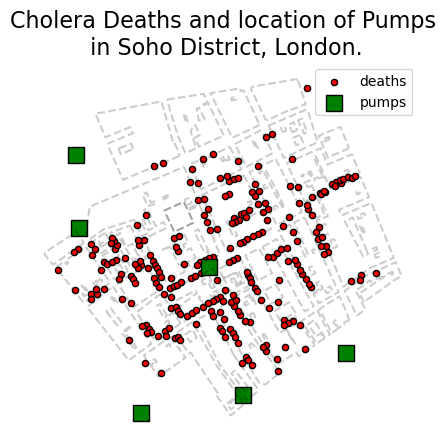

In [7]:
fig, ax = plt.subplots()

# calculate marker size for plotting
death_by_build['plotted_size'] = death_by_build.deaths * 10

death_by_block.boundary.plot(color='k', alpha=.2, linestyle='dashed',ax=ax); # plot city blocks
#death_by_build.plot(markersize = 'plotted_size', ax=ax, color='r', label='deaths', marker='o'); # plot deaths by buildings 
death_by_build.plot(ax=ax, color='r', label='deaths', marker='o', markersize=20, ec='k')
pumps.plot(marker='s', color='g', ec='k', markersize=120, ax=ax, label='pumps'); # plot pumps

ax.set_title('Cholera Deaths and location of Pumps\n in Soho District, London.', fontsize=16);
_ = ax.axis('off')
ax.legend();

In [8]:
# fig, ax = plt.subplots(figsize=(10,10))

# # calculate marker size for plotting
# death_by_block.boundary.plot(color='k', alpha=.2, linestyle='dashed',ax=ax); # plot city blocks
# pumps.plot(marker='s', color='g', ec='k', markersize=120, ax=ax, label='pumps') # plot pumps

# # have to import another library for a pretty legend 
# gplt.pointplot(
#     death_by_build,
#     scale='deaths',
#     limits=(0, 20),
#     #hue='deaths',
#     #cmap='Reds',
#     color='red',
#     #scheme='Quantiles',
#     legend=True,
#     legend_var='scale',
#     ax=ax
# )

In [9]:
death_by_build

,ID,x,y,deaths,pumpID,distpump,distBSpump,BSpump,geometry,plotted_size
0,1,529308.741420,181031.351546,3,1,88.048464,88.048,1,POINT (-0.13793 51.51342),30
1,2,529312.163571,181025.172401,2,1,84.400413,84.400,1,POINT (-0.13788 51.51336),20
2,3,529314.382429,181020.293688,1,1,82.319197,82.319,1,POINT (-0.13785 51.51332),10
3,4,529317.379645,181014.258771,1,1,79.916876,79.917,1,POINT (-0.13781 51.51326),10
4,5,529320.675449,181007.871628,4,1,77.809998,77.810,1,POINT (-0.13777 51.51320),40
...,...,...,...,...,...,...,...,...,...,...
245,246,529362.664552,181156.058382,3,1,135.342515,135.343,1,POINT (-0.13711 51.51453),30
246,247,529365.151891,181176.128560,2,1,154.335243,154.336,1,POINT (-0.13706 51.51471),20
247,248,529274.165044,180907.312598,1,8,114.615825,169.873,0,POINT (-0.13847 51.51231),10
248,249,529299.361335,180873.184663,1,8,78.425370,180.358,0,POINT (-0.13812 51.51200),10


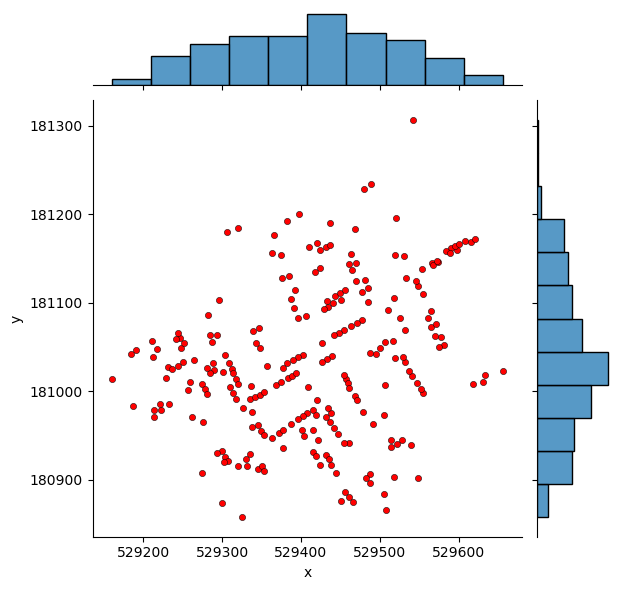

In [10]:
# Generate scatter plot
sns.jointplot(x="x", y="y", data=death_by_build, s=20, ec='k', fc='r');

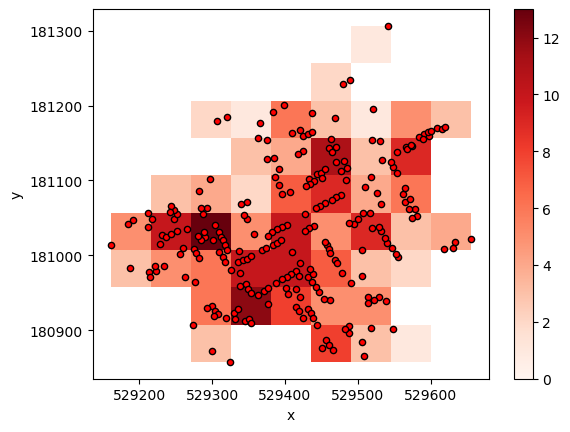

In [11]:
# Generate scatter plot
f, ax = plt.subplots()

sns.histplot(x="x", y="y", data=death_by_build, bins=9, cbar=True, cmap="Reds");
ax.scatter(death_by_build.x, death_by_build.y, color='r', s=20, ec='k');

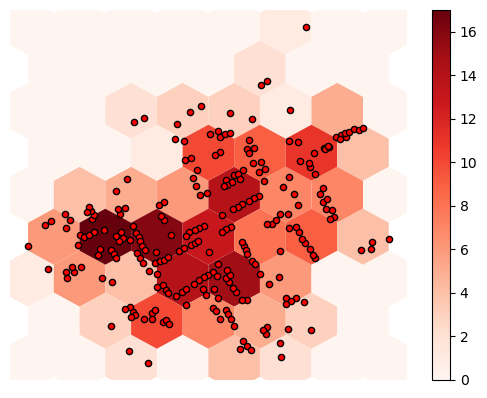

In [12]:
f, ax = plt.subplots()

hb = ax.hexbin(
    death_by_build["x"],
    death_by_build["y"],
    gridsize=7,
    linewidths=0,
    #alpha=0.5,
    cmap="Reds",
)

ax.scatter(death_by_build.x, death_by_build.y, color='r', s=20, ec='k')

# Add colorbar
plt.colorbar(hb)
# Remove axes
ax.set_axis_off()

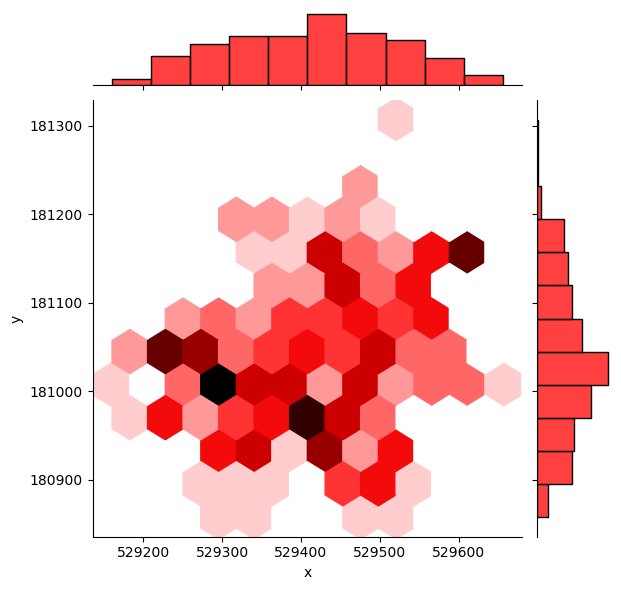

In [13]:
# Generate scatter plot
sns.jointplot(x="x", y="y", data=death_by_build, kind='hex', color='red');

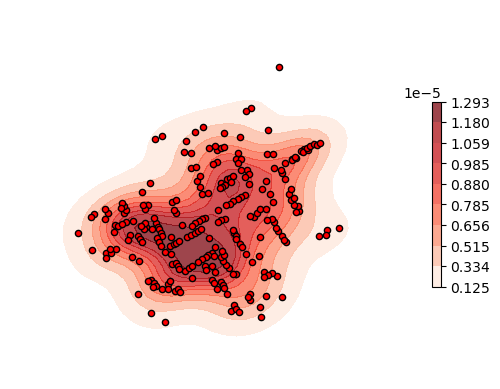

In [14]:
f, ax = plt.subplots()

sns.kdeplot(
    data=death_by_build,
    gridsize=50,
    levels=10,
    x = "x",
    y = "y",
    #bw_adjust=1.5,
    fill=True,
    alpha=0.75,
    cmap="Reds",
    cbar=True, 
    cbar_kws=dict(shrink=.5)
)

ax.scatter(death_by_build.x, death_by_build.y, color='r', s=20, ec='k')

# Remove axes
ax.set_axis_off()

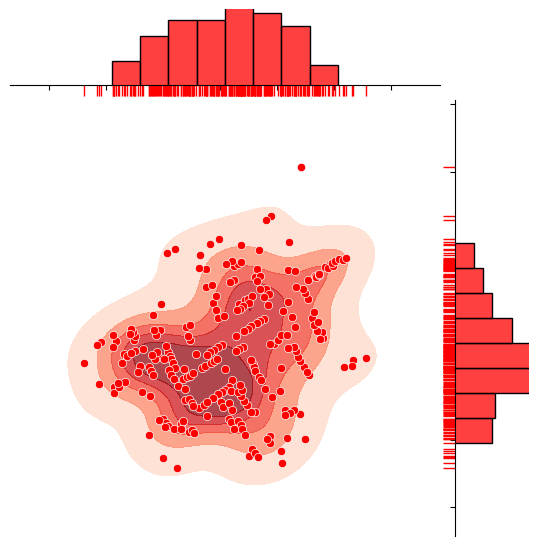

In [15]:
g = sns.jointplot(data=death_by_build, x="x", y="y", color='red')
g.plot_joint(sns.kdeplot, zorder=0, levels=6, fill=True, alpha=.75, cmap='Reds')
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)
g.ax_joint.set_axis_off() # turn axis off 

# Measures of Centrography

* Central tendency
    * Mean Center 
    * Manhattan Median 
    * Euclidean Median
* Dispersion 
    * Ellipse 
* Shape (Extent)
    * Convext Hull
    * Bounding Box 
    * etc. 

# Central Tendency

# Mean Center 

$$
x_{mc} = \frac{ \sum x_i }{n}
$$
$$
y_{mc} = \frac{ \sum y_i }{n}
$$

# Manhattan Median 

> The Manhattan median is the location which minimizes the absolute distance to all the event points. It is an extension of the median measure in one-dimensional space to two-dimensional space. Since in one-dimensional space, a median is the number separating the higher half of a dataset from the lower half, we define the Manhattan median as a tuple whose first element is the median of  coordinates and second element is the median of  coordinates.

$$
min  f(x_{mm},y_{mm})= \sum^n_{i=1}(|x_i-x_{mm}|+|y_i-y_{mm}|)
$$

# Euclidean Median 

> The Euclidean Median is the location from which the sum of the Euclidean distances to all points in a distribution is a minimum. It is an optimization problem and very important for more general location allocation problems. There is no closed form solution. We can use first iterative algorithm (Kuhn and Kuenne, 1962) to approximate Euclidean Median.

$$
min  f(x_{em},y_{em})= \sum^n_{i=1} \sqrt{(x_i-x_{em})^2+(y_i-y_{em})^2}
$$

In [16]:
#import centragraphy analysis functions 
from pointpats.centrography import hull, mbr, mean_center, weighted_mean_center, manhattan_median 
from pointpats.centrography import std_distance,euclidean_median,ellipse
from pointpats import PointPattern

In [17]:
# extract coords from the dataframe and stack them in lng/lat format for using pointpats package
points = np.stack((death_by_build.x.to_numpy(), death_by_build.y.to_numpy()), axis=1)

pp = PointPattern(points) #create a point pattern "pp" from list 

In [18]:
weights = death_by_build.deaths # extract weights for weighted mean 

mc = mean_center(pp.points) # mean center
wmc = weighted_mean_center(pp.points, weights) # weighted mean
em = euclidean_median(pp.points) # euclidean median 
mm = manhattan_median(pp.points)

print('Mean Center coordinates \t \t:', mc)
print('Weighted MC coordinates \t \t:', wmc)
print('Euclidean Median coordinates \t \t:', em)
print('Manhattan Medi an coordinates \t \t:', mm)

Mean Center coordinates 	 	: [529413.85369427 181033.78696473]
Weighted MC coordinates 	 	: [529414.75675154 181031.89339795]
Euclidean Median coordinates 	 	: [529410.20734233 181027.07075087]
Manhattan Medi an coordinates 	 	: [529422.525932 181027.12929 ]


C:\Users\barguzin\anaconda3\envs\geo_env\lib\site-packages\pointpats\centrography.py:208: UserWarning: Manhattan Median is not unique for even point patterns.
  warnings.warn(s)


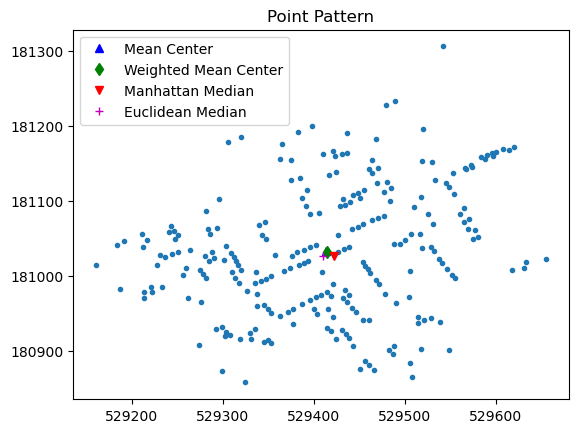

In [19]:
pp.plot()
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.plot(wmc[0], wmc[1], 'gd', label='Weighted Mean Center')
plt.plot(mm[0], mm[1], 'rv', label='Manhattan Median')
plt.plot(em[0], em[1], 'm+', label='Euclidean Median')
plt.legend(numpoints=1)

# Dispersion

# Standard Distance & Standard Distance Circle 

> The Standard distance is closely related to the usual definition of the standard deviation of a data set, and it provides a measure of how dispersed the events are around their mean center

$$
SD = \displaystyle \sqrt{\frac{\sum^n_{i=1}(x_i-x_{m})^2}{n} + \frac{\sum^n_{i=1}(y_i-y_{m})^2}{n}}
$$

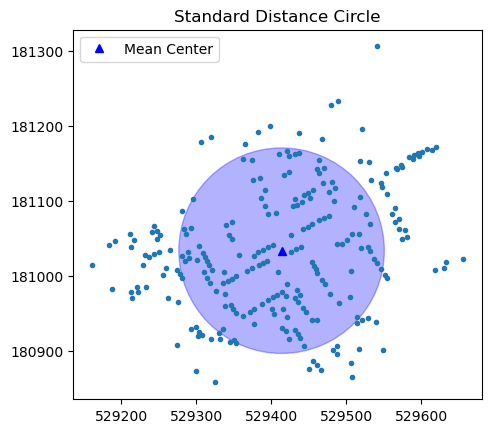

In [20]:
stdd = std_distance(pp.points)

circle1=plt.Circle((mc[0], mc[1]),stdd,color='blue', alpha=.3)
ax = pp.plot(get_ax=True, title='Standard Distance Circle')
ax.add_artist(circle1)
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
ax.set_aspect('equal')
plt.legend(numpoints=1)

# Standard Deviational Ellipse 

> Compared with standard distance circle which measures dispersion using a single parameter **SD**, standard deviational ellipse measures dispersion and trend in two dimensions through angle of rotation $\theta$, dispersion along major axis $s_x$ and dispersion along minor axis $s_y$.  

$$
s_x = \displaystyle \sqrt{\frac{2(\sum_{i=1}^n (x_i-\bar{x})\cos(\theta) - \sum_{i=1}^n (y_i-\bar{y})\sin(\theta))^2}{n-2}} 
$$

$$
s_y = \displaystyle \sqrt{\frac{2(\sum_{i=1}^n (x_i-\bar{x})\sin(\theta) - \sum_{i=1}^n (y_i-\bar{y})\cos(\theta))^2}{n-2}}
$$

$$
\theta = \displaystyle \arctan{\{ (\sum_i(x_i-\bar{x})^2-\sum_i(y_i-\bar{y})^2) + \frac{[(\sum_i(x_i-\bar{x})^2-\sum_i(y_i-\bar{y})^2)^2 + 4(\sum_i(x-\bar{x})(y_i-\bar{y}))^2]^\frac{1}{2}}{2\sum_i(x-\bar{x})(y_i-\bar{y})}\}}
$$

<Figure size 640x480 with 0 Axes>

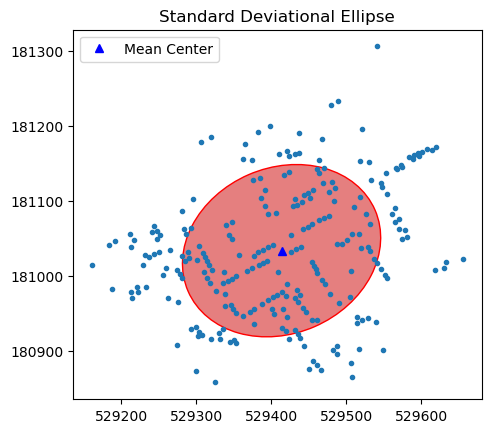

In [21]:
sx, sy, theta = ellipse(pp.points)
theta_degree = np.degrees(theta) #need degree of rotation to plot the ellipse

from matplotlib.patches import Ellipse
from pylab import figure,show,rand
fig = figure()
#ax = fig.add_subplot(111, aspect='equal')
e = Ellipse(xy=mean_center(pp.points), width=sx*2, height=sy*2, angle=-theta_degree) #angle is rotation in degrees (anti-clockwise)
ax = pp.plot(get_ax=True, title='Standard Deviational Ellipse')
ax.add_artist(e)
e.set_clip_box(ax.bbox)
e.set_facecolor([0.8,0,0, .5])
e.set_edgecolor([1,0,0])
ax.set_aspect('equal')
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.legend(numpoints=1)
show()

# Shape Analysis

# Convex Hull 

> The convex hull of a point pattern pp is the smallest convex set that contains pp. 

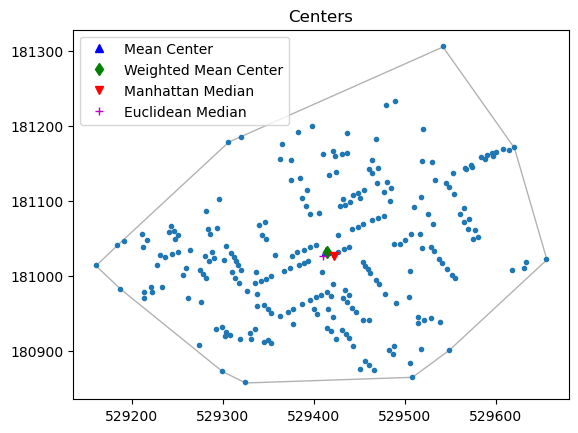

In [22]:
pp.plot(title='Centers', hull=True ) #plot point pattern "pp" as well as its convex hull
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.plot(wmc[0], wmc[1], 'gd', label='Weighted Mean Center')
plt.plot(mm[0], mm[1], 'rv', label='Manhattan Median')
plt.plot(em[0], em[1], 'm+', label='Euclidean Median')
plt.legend(numpoints=1)

# Minimum Bounding Rectangle

> Minimum Bounding Rectangle (Box) is the same as the minimum bounding Rectangle of its convex hull. Thus, it is almost always bigger than convex hull.

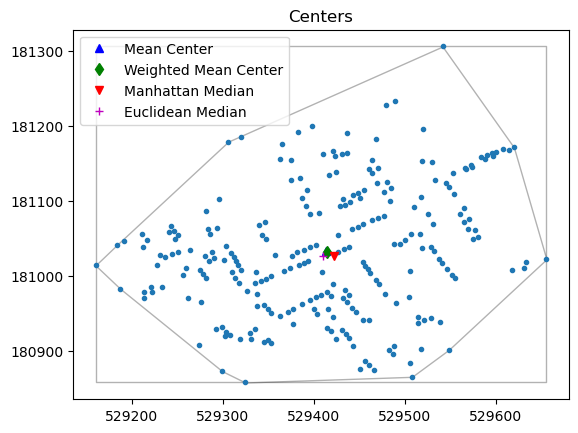

In [23]:
pp.plot(title='Centers',  hull=True , window=True )#plot point pattern "pp", convex hull, and Minimum Bounding Rectangle
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.plot(wmc[0], wmc[1], 'gd', label='Weighted Mean Center')
plt.plot(mm[0], mm[1], 'rv', label='Manhattan Median')
plt.plot(em[0], em[1], 'm+', label='Euclidean Median')
plt.legend(numpoints=1)

# Quadrat Statistic 

* CSR (Uniform and Independent) 
* Partition space into regularly spaced grid cells.
* Since Process is uniform - expect same intensity everywhere

# Quadrat Statistic

$$
s^2 = \frac{\sum(x_i - \bar{x})^2}{m-1}
$$

$$
VMR = \frac{s^2}{\bar{x}}, \quad z = \Bigg( \sqrt{\frac{m-1}{2}} VMR - 1 \Bigg)
$$

where $m$ is the number of quadrats, $\bar{x}$ is the mean number of points per quadrat, $s^2$ is the variance of the number of points per quadrat, $(x-\bar{x})^2$ is the cell deviate and $VMR$ is the variance-mean ratio. 

See more details [here](http://webspace.ship.edu/pgmarr/Geo441/Examples/Quadrat%20Analysis.pdf)

# Quadrat Statistic 

* H_0: The distribution of cholera deaths is not significantly different than random (Null Hypothesis)
* H_a: The distribution of cholera deaths is significantly different than random (Alternative Hypothesis)

$\alpha=0.05$

p-value: 5.956733903969489e-23


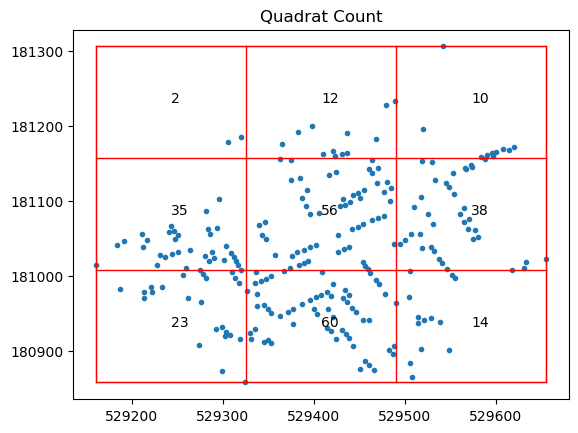

In [24]:
from pointpats import (
    distance_statistics, QStatistic,
    random, PointPattern, centrography
)

qstat = QStatistic(points)
print(f'p-value: {qstat.chi2_pvalue}')
qstat.plot()

In [25]:
list_counts = np.array([2,12,10,35,56,38,23,60,14])
#mean_count = np.repeat(27.7, len(list_counts))
m = 9
points = 250

xbar = points / m
var = np.var(list_counts)
var = np.sum((list_counts - xbar)**2) / m-1
vmr = var / xbar
#z = (np.sqrt((m-1)/2)*(vmr-1))
z = np.sqrt((m-1)/2)*(vmr-1)

print('mean points per cell:', xbar)
print('variance:', var)
print('VMR:', vmr)
print('z-score', z)

mean points per cell: 27.77777777777778
variance: 380.5061728395062
VMR: 13.698222222222222
z-score 25.396444444444445


## If $z$ is not within $z_l \leq z \leq z_h$, where $z$ comes from the $z$-table and $z_l=-1.96$ and $z_h=1.96$, we cannot accept the null hypothesis. 

p-value: 0.048347097224378154


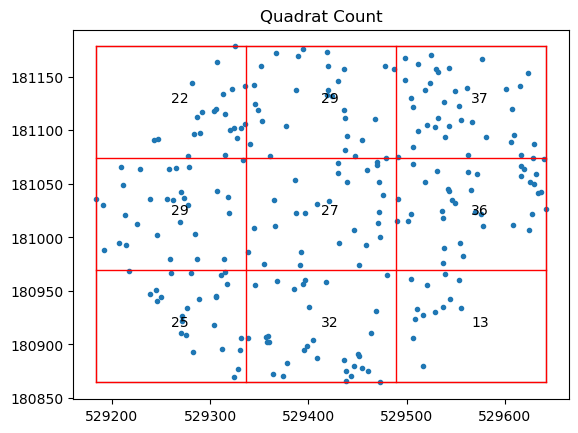

In [27]:
hull = centrography.ConvexHull(pp.points)
random_poisson = random.poisson(hull, size=len(pp.points))

ran_qstat = QStatistic(random_poisson)
print(f'p-value: {ran_qstat.chi2_pvalue}')
ran_qstat.plot()

# Distance-based Measures of PPA

* Nearest Neighbor Distance 
* Distance functions (GFK) 

# Mean Nearest Neighbor Distance Statistics

The nearest neighbor for a point $u$ must meet the following condition: 

$$
d_{u,N(u)} \leq d_{u,j} \forall j \in S - u
$$

It was demonstrated by Clark and Evans(1954) that mean nearest neighbor distance statistics distribution is a normal distribution under null hypothesis (underlying spatial process is CSR). We can utilize the test statistics to determine whether the point pattern is the outcome of CSR. If not, is it the outcome of cluster or regular spatial process?

$$
\bar{d}_{min}=\frac{1}{n} \sum_{i=1}^n d_{min}(s_i)
$$

(array([188.,  46.,   8.,   6.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 2.46704738, 11.18215934, 19.89727131, 28.61238327, 37.32749524,
        46.0426072 , 54.75771917, 63.47283113, 72.1879431 , 80.90305506,
        89.61816702]),
 <BarContainer object of 10 artists>)

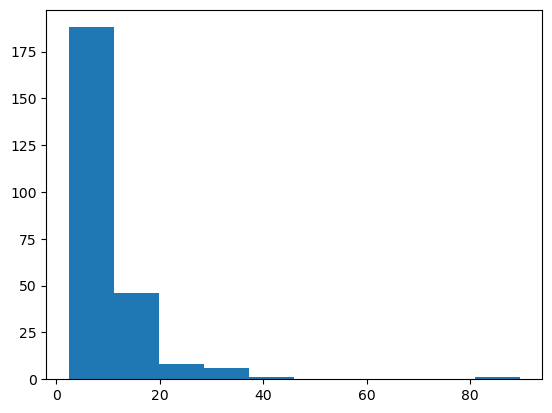

In [28]:
tt = pp.knn()
# plot distances to nearest neighbor
plt.hist(tt[1])

In [29]:
# tt = pp.knn(3)
# new_tt = tt[1].reshape(tt[1].shape[0]*tt[1].shape[1],)
# plt.hist(new_tt)

(array([30., 43., 53., 45., 32., 19., 13., 10.,  2.,  3.]),
 array([ 1.41832384,  4.42328832,  7.42825279, 10.43321727, 13.43818175,
        16.44314622, 19.4481107 , 22.45307518, 25.45803965, 28.46300413,
        31.46796861]),
 <BarContainer object of 10 artists>)

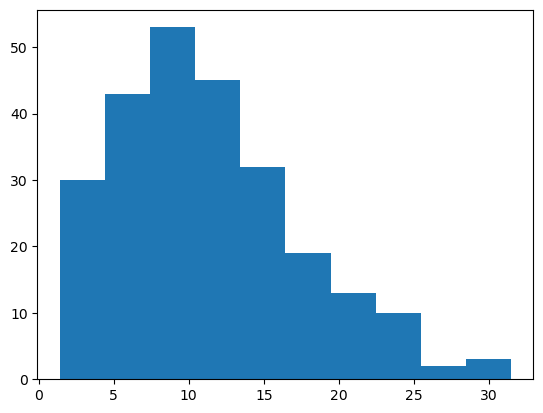

In [30]:
random_point_pattern = PointPattern(random_poisson)

tt = random_point_pattern.knn()
# plot distances to nearest neighbor
plt.hist(tt[1])

# Questions? 

## Data Report instructions are on GauchoSpace and on the [course website](https://barguzin.github.io/ucsb_geog172/project/data_report.html). 